<h1><center>Driver Drowsiness Detection</center></h1>

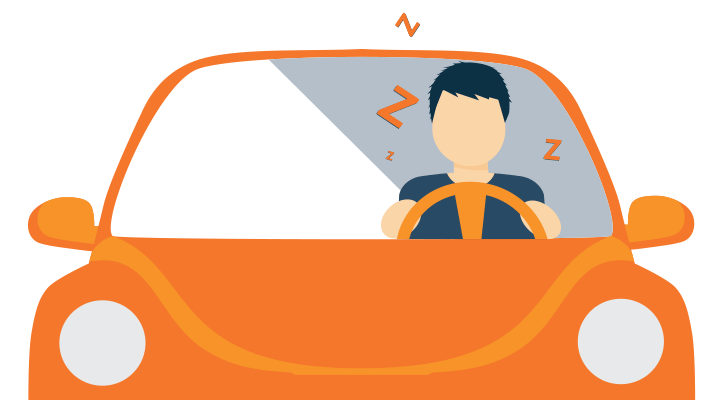

Here we are importing the Libraries:
<br>
**OpenCV (cv2)** - for basic image processing functions
<br>
**numpy** - for array related functions
<br>
**dlib** - for deep learning based Modules and face landmark detection. IT detects 68 landmarks on the face which will provide better accuracy for our model. It is a open source library written in programming language C++.
<br>
**face_utils** for basic operations of conversion

In [ ]:
import cv2
import numpy as np
import dlib
from imutils import face_utils

We are initializing the camera and capturing the live instances using **Open Cv (CV2)**, which will be fed continiously to the model of dynamic predictions.

In [ ]:
Cap = cv2.VideoCapture(0)

Here we are initializing the face detector and landmark detector using DLIB
<br>
**get_frontal_face_detector** is an inbuilt module in Dlib for detecting the frontal face. In our model it will give us better accuacy than the Haar cascades modules of Open CV
<br>
**Predictor** function is an important part in this model development as it will predict and detect the landmarks in our face for various features like eyebrows, eyes, nose, lips, jawline. A total of 68 landmarks can be predicted.
<br>
The below image is a reference of the predicted landmarks:
<br>
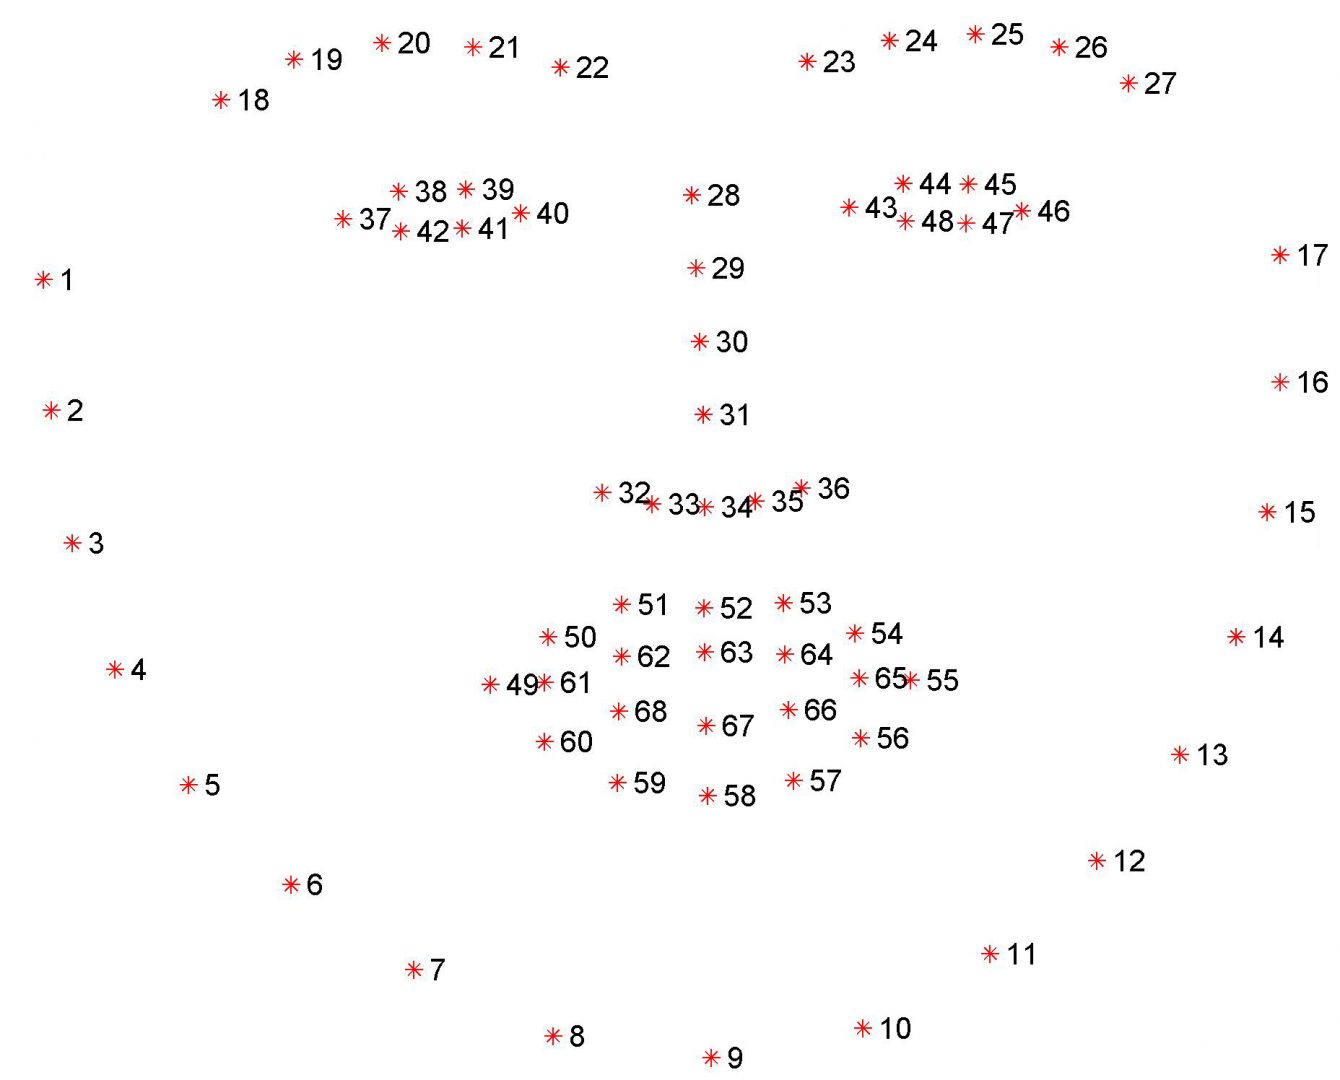

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [ ]:
#status marking for current state

In [ ]:
sleep = 0
drowsy = 0
active = 0
status=""
color=(0,0,0)

We are defining a function **compute** here to calculate the Euclidean Distance between 2 points. We are using a Numpy Linear Algebra function (np.linalg.norm) to calculate the Euclidean distance between 2 points.
<br>
However, this can be calculated manually also with the help of X and Y coordinate values. Please refer the below image for mathematical understanding.
<br>
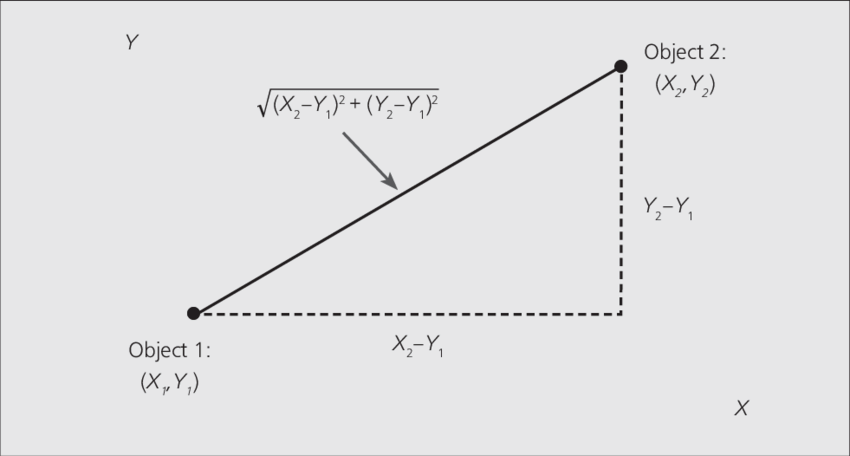

In [ ]:
def compute(ptA,ptB):
    dist = np.linalg.norm(ptA - ptB)
    return dist

We are defining a function **blinked** here. There are 6 points(landamarks) detected in one eye, with the help of there points we can predict if the eye is closed or open.
<br>
We will have 2 points detecte at the horizontals extremes of the eye (long distance) and 2 points on the up and 2 points ont he down (vertical short distance) part of the eye.
We will calculate th Eye Aspect Ratio to detrmine if the eye is blinkin. To calculate the eye aspect ratio we will compute the Eucladian distance between the 2 hrizontal points of the eye(long distnce) and the 4 vertical points f the eye (short distance).
We add the shprt diatnces and store it in a variable called 'up' and store the long distance in a variable 'down'. The ratio is obtained by- up/(2*down)
<br>
The standart Eye Aspect Ratio Of an Open eye shuold be >0.25

In [ ]:
def blinked(a,b,c,d,e,f):
    up = compute(b,d) + compute(c,e)
    down = compute(a,f)
    ratio = up/(2.0*down)
    
    #Checking if it is blinked
    if(ratio>0.25):
        return 2
    elif(ratio>0.21 and ratio<=0.25):
        return 1
    else:
        return 0

Now we are using a while loop to predict basis our input instance, whether the eyes are cosed or open. We are using the frontal face detector defined earilier from Dlib to create a region of interest. We have shaped the results of the detector into a numpy array.
using If and Else statement we are defining the status (Sleeping, Drowse or Active) and the status are updated after 7 frames to ignore blinks. Based on the ratio defined the stataus is predicted and updated based on the number of frames.
<br>
**waitKey(0)** will display the window infinitely until any keypress.
<br>
**waitKey(1)** will display a frame for 1 ms, after which display will be automatically closed.

In [ ]:
while True:
    _, frame = Cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

#         face_frame = frame.copy() #this is a copy frame to show the detected landmarks in frontal face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        
        left_blink = blinked(landmarks[36],landmarks[37], 
            landmarks[38], landmarks[41], landmarks[40], landmarks[39])
        right_blink = blinked(landmarks[42],landmarks[43], 
            landmarks[44], landmarks[47], landmarks[46], landmarks[45])
        
        
        if(left_blink==0 or right_blink==0):
            sleep+=1
            drowsy=0
            active=0
            if(sleep>6):
                status="HIGH ALERT SLEEPING"
                color = (255,0,0)

        elif(left_blink==1 or right_blink==1):
            sleep=0
            active=0
            drowsy+=1
            if(drowsy>6):
                status="ALERT DROWSY ALERT"
                color = (0,0,255)

        else:
            drowsy=0
            sleep=0
            active+=1
            if(active>6):
                status="DRIVER ACTIVE"
                color = (0,255,0)
        
        cv2.putText(frame, status, (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color,3)

#         for n in range(0, 68):
#             (x,y) = landmarks[n]
#             cv2.circle(face_frame, (x, y), 1, (255, 255, 255), -1)

    cv2.imshow("Frame", frame)
#     cv2.imshow("Result of detector", face_frame) #this is a copy frame to show the detected landmarks in frontal face
    key = cv2.waitKey(1)
    if key == 27:
          break

The output of the frame looks like below for different status:
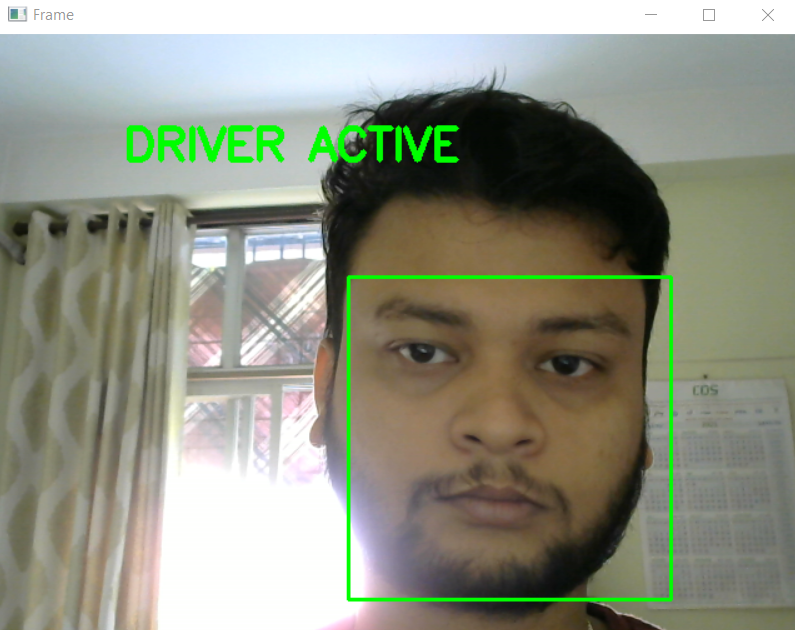
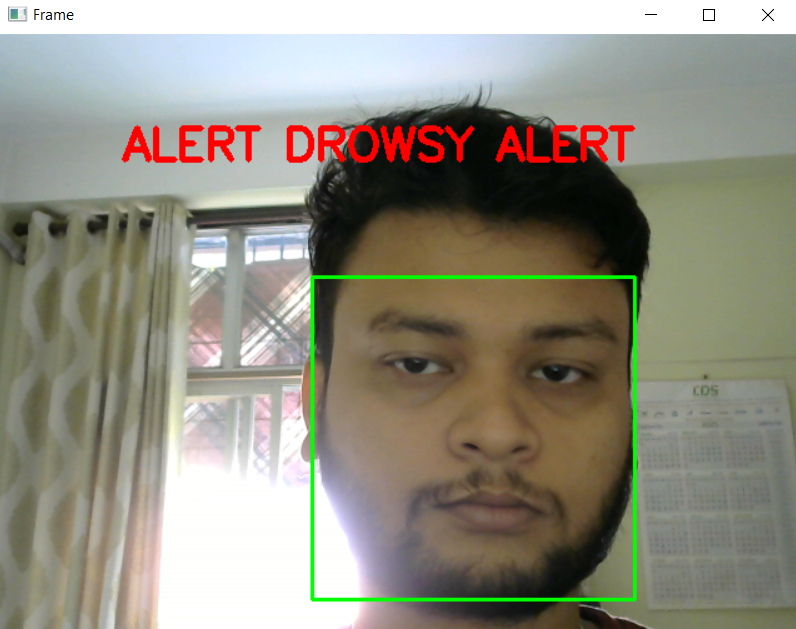
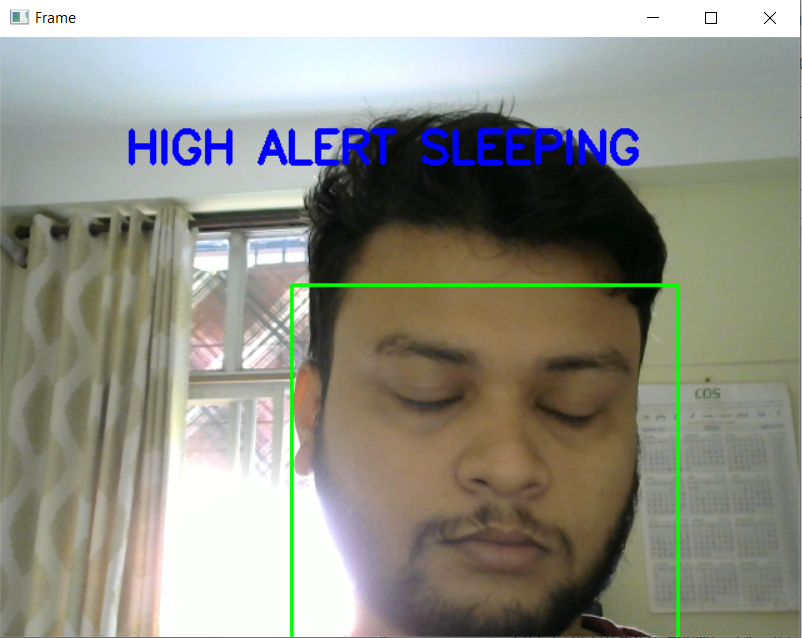